## Load Important Libraries

In [1]:
# Importing libraries for data processing and visualization    
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
#from imutils import paths
import seaborn as sns
import random
import time
from datetime import datetime
import json

In [2]:
# Importing libraries for image pre-processing and classification
import cv2
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
import os
#from skillsnetwork import cvstudio

## Download The Images and Annotations

In [4]:
# Importing all images in the folder
images = [cv2.imread(file) for file in glob.glob(r"C:\Users\User\Desktop\maaster\Tez\imageClassificationPractice\KNN\cats_dogs_images\*.jpg")]

In [5]:
# Opening JSON file
f = open('annotation.json')
  
# returns JSON object as a dictionary
annotation = json.load(f)

# Closing file
f.close()

In [6]:
first_five = {k: annotation["annotations"][k] for k in list(annotation["annotations"])[:5]}
first_five

{'645c2283-a71c-42ee-a841-3a696018eef8.jpg': [{'label': 'dog'}],
 'e95d9b59-1dd8-4747-abb9-bde400b7d25e.jpg': [{'label': 'dog'}],
 'e9d94988-099a-48e9-b6ad-bd939d0b92c0.jpg': [{'label': 'dog'}],
 '1710540b-b4dd-4697-bb7a-8e423fb05b1c.jpg': [{'label': 'dog'}],
 '4dc102a8-4d32-4870-9793-7d1199e33c97.jpg': [{'label': 'dog'}]}

# Load and Plot an Image

We will train and classify your images using the k-NN classifier using the <code>OpenCV</code> library. Before we start, let's get the images and take a look at some of them.

We will pick random images and take a look:

In [7]:
randomFileName = random.choice(list(annotation["annotations"].keys()))
randomFileName

'645c2283-a71c-42ee-a841-3a696018eef8.jpg'

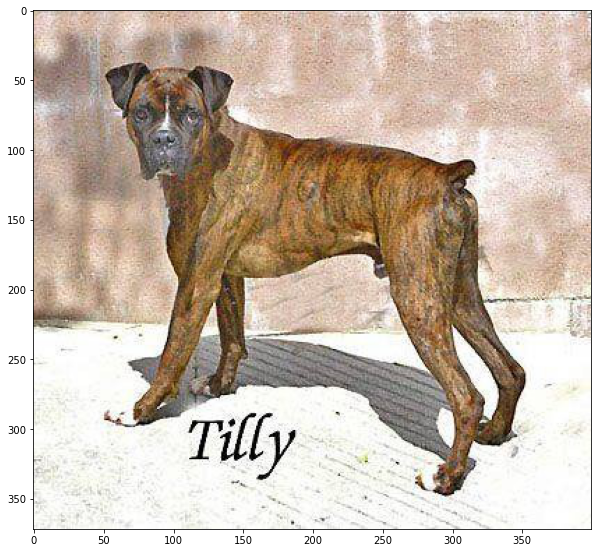

In [8]:
filePath = r"C:\Users\User\Desktop\master\Tez\imageClassificationPractice\KNN\cats_dogs_images"
 
# Join various path components
randomFilePath = os.path.join(filePath, randomFileName)

# Read sample image
sampleImage = cv2.imread(randomFilePath)

## Convert to RGB
image = cv2.cvtColor(sampleImage, cv2.COLOR_BGR2RGB)

## Now plot the image
plt.figure(figsize=(10,10))
plt.imshow(image, cmap = "gray")
plt.show()

Convert image to grayscale - grayscale simplifies the algorithm and reduces computational requirements.

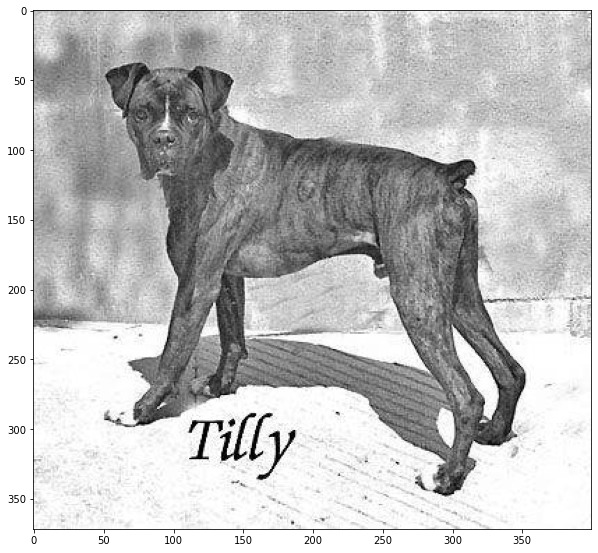

In [9]:
sampleImage = cv2.cvtColor(sampleImage,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(sampleImage, cmap = "gray")
plt.show()

Resize image - resizing image helps the algorithm train faster.

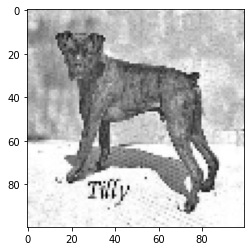

In [10]:
sampleImage = cv2.resize(sampleImage, (100, 100))
plt.imshow(sampleImage, cmap = "gray")
plt.show()

Flatten image - makes the image a numpy array for the algorithm to handle and recognize.

In [11]:
pixels = sampleImage.flatten()
pixels

array([197, 199, 201, ..., 251, 250, 251], dtype=uint8)

## Repeat the Process Above for All Images

We will now repeat the same process above to load and process all the images you’ve annotated and label each picture. KNN is supervised machine learning algorithm, therefore we have to explicitly create labels for the machine.

Depending on how much data you have, this will take a while to run...


In [12]:
image_paths = glob.glob(r"C:\Users\User\Desktop\master\Tez\imageClassificationPractice\KNN\cats_dogs_images\*.jpg")
z = 0
for (i, image_path) in enumerate(image_paths):
    #read image
    z = z + 1
    image = cv2.imread(image_path)

In [14]:
image_paths = glob.glob(r"C:\Users\User\Desktop\master\Tez\imageClassificationPractice\KNN\cats_dogs_images\*.jpg")
train_images = []
train_labels = []
class_object = annotation['labels']

# loop over the input images
for (i, image_path) in enumerate(image_paths):
    #read image
    image = cv2.imread(image_path)
    #make images gray
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #label image using the annotations
    label = class_object.index(annotation["annotations"][image_path[82:]][0]['label'])
    tmp_label = annotation["annotations"][image_path[82:]][0]['label']
    # resize image
    image = cv2.resize(image, (32, 32))
    # flatten the image
    pixels = image.flatten()
    #Append flattened image to
    train_images.append(pixels)
    train_labels.append(label)
    print('Loaded...', '\U0001F483', 'Image', str(i+1), 'is a', tmp_label)

Loaded... 💃 Image 1 is a dog
Loaded... 💃 Image 2 is a dog
Loaded... 💃 Image 3 is a cat
Loaded... 💃 Image 4 is a cat
Loaded... 💃 Image 5 is a dog
Loaded... 💃 Image 6 is a dog
Loaded... 💃 Image 7 is a cat
Loaded... 💃 Image 8 is a cat
Loaded... 💃 Image 9 is a dog
Loaded... 💃 Image 10 is a cat
Loaded... 💃 Image 11 is a cat
Loaded... 💃 Image 12 is a cat
Loaded... 💃 Image 13 is a dog
Loaded... 💃 Image 14 is a dog
Loaded... 💃 Image 15 is a dog
Loaded... 💃 Image 16 is a dog
Loaded... 💃 Image 17 is a cat
Loaded... 💃 Image 18 is a cat
Loaded... 💃 Image 19 is a dog
Loaded... 💃 Image 20 is a dog
Loaded... 💃 Image 21 is a cat
Loaded... 💃 Image 22 is a dog
Loaded... 💃 Image 23 is a cat
Loaded... 💃 Image 24 is a cat
Loaded... 💃 Image 25 is a dog
Loaded... 💃 Image 26 is a cat
Loaded... 💃 Image 27 is a cat
Loaded... 💃 Image 28 is a dog
Loaded... 💃 Image 29 is a dog
Loaded... 💃 Image 30 is a cat
Loaded... 💃 Image 31 is a dog
Loaded... 💃 Image 32 is a cat
Loaded... 💃 Image 33 is a dog
Loaded... 💃 Image 3

Create an array of the <code>train_images</code> and <code>train_labels</code>. <code>OpenCV</code> only identifies arrays of type <code>float32</code> for the training samples and array of shape <code>(label size, 1)</code> for the training labels. We can do that by specifying <code>astype('float32')</code> on the numpy array of the training samples and convert the training labels to integers and <code>reshape</code> the array to <code>(label size, 1)</code>. When you print the <code>train_labels</code>, the array will look like this <code>\[\[1], \[0], ..., \[0]]</code></p>


In [15]:
train_images = np.array(train_images).astype('float32')
train_labels = np.array(train_labels)

In [16]:
train_images

array([[ 59.,  65.,  58., ..., 169., 180., 170.],
       [102.,  99.,  96., ...,  47.,  41.,  47.],
       [  8.,  15.,  32., ..., 207., 202., 169.],
       ...,
       [184., 181., 171., ...,  68.,  63.,  46.],
       [ 74.,  73., 104., ...,  94., 101.,  83.],
       [255., 255., 165., ...,  32.,  31.,  29.]], dtype=float32)

In [17]:
print(len(train_images[0]))
print(len(train_images))
print(len(train_labels))

1024
200
200


In [18]:
train_labels = train_labels.astype(int)
train_labels = train_labels.reshape((train_labels.size,1))
print(train_labels)

[[0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]]

Split data into training and test set with a test size of your choice:

In [19]:
test_size = 0.2
train_samples, test_samples, train_labels, test_labels = train_test_split(
    train_images, train_labels, test_size=test_size, random_state=0)

In [20]:
start_datetime = datetime.now()

knn = cv2.ml.KNearest_create()
knn.train(train_samples, cv2.ml.ROW_SAMPLE, train_labels)

## get different values of K
k_values = [1, 2, 3, 4, 5]
k_result = []
for k in k_values:
    ret,result,neighbours,dist = knn.findNearest(test_samples,k=k)
    k_result.append(result)
flattened = []
for res in k_result:
    flat_result = [item for sublist in res for item in sublist]
    flattened.append(flat_result)

end_datetime = datetime.now()
print('Training Duration: ' + str(end_datetime-start_datetime))

Training Duration: 0:00:00.013901


In [21]:
## create an empty list to save accuracy and the cofusion matrix
accuracy_res = []
con_matrix = []
## we will use a loop because we have multiple value of k
for k_res in k_result:
    label_names = [0, 1]
    cmx = confusion_matrix(test_labels, k_res, labels=label_names)
    con_matrix.append(cmx)
    ## get values for when we predict accurately
    matches = k_res==test_labels
    correct = np.count_nonzero(matches)
    ## calculate accuracy
    accuracy = correct*100.0/result.size
    accuracy_res.append(accuracy)
## stor accuracy for later when we create the graph
res_accuracy = {k_values[i]: accuracy_res[i] for i in range(len(k_values))}
list_res = sorted(res_accuracy.items())

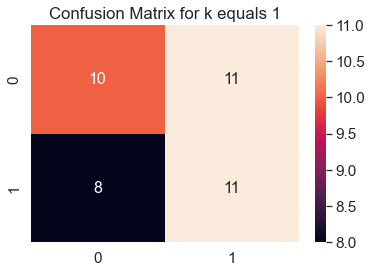

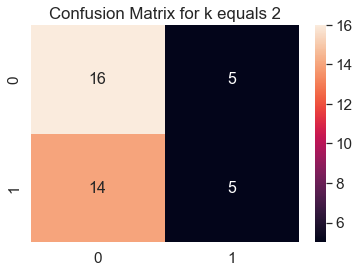

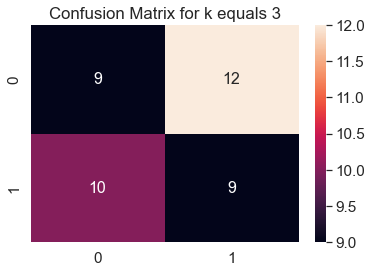

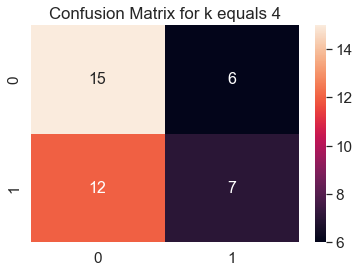

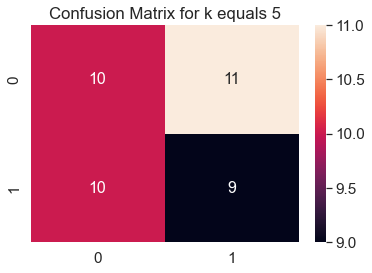

In [22]:
t=0
## for each value of k we will create a confusion matrix
for array in con_matrix:
    df_cm = pd.DataFrame(array)
    sns.set(font_scale=1.4) # for label size
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt = ".0f") # font size
    t += 1
    title = "Confusion Matrix for k equals " + str(t)
    plt.title(title)
    plt.show()


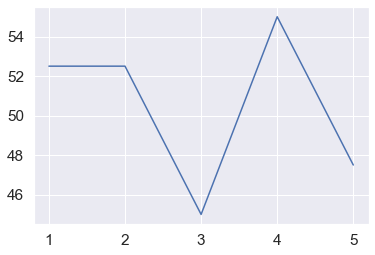

In [23]:
## plot accuracy against 
x, y = zip(*list_res)
plt.plot(x, y)
plt.show()

In [24]:
k_best = max(list_res,key=lambda item:item[1])[0]
k_best

4

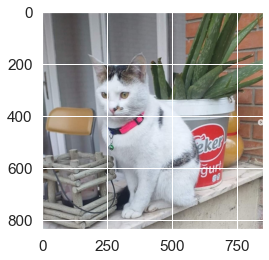

In [25]:
my_image = cv2.imread("Cat1.jpg")
## let's see what the image looks like
image = cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [26]:
#make images gray
my_image = cv2.cvtColor(my_image,cv2.COLOR_BGR2GRAY)

In [27]:
my_image = cv2.resize(my_image, (32, 32))

In [28]:
pixel_image = my_image.flatten()
pixel_image = np.array([pixel_image]).astype('float32')

In [29]:
ret,result,neighbours,dist = knn.findNearest(pixel_image,k=k_best)
print(neighbours)
print('Your image was classified as a ' + str(annotation['labels'][int(ret)]))

[[0. 1. 0. 0.]]
Your image was classified as a dog
